In [1]:
from matplotlib import pyplot as plt

In [3]:
# List scalar tags that start with "Metrics/"
metrics_tags = [tag for tag in ea.Tags()["scalars"] if tag.startswith("Metrics/")]
print(metrics_tags)

['Metrics/Val_PSNR_Dehaze', 'Metrics/Val_SSIM_Dehaze']


In [16]:
log_file_path_without_guided = r"C:\Users\abd\d\ai\dehaze\runs\sr_training_logs_teacher_stepLR\events.out.tfevents.1746005457.m.8756.0"

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

ea_without_guided = EventAccumulator(log_file_path_without_guided)
ea_without_guided.Reload()

for tag_without_guided in ea_without_guided.Tags()["scalars"]:
    print(f"\nTag: {tag_without_guided}")
    for scalar_event in ea_without_guided.Scalars(tag_without_guided):
        print(f"Step: {scalar_event.step}, Value: {scalar_event.value}")



Tag: Loss/SR
Step: 5, Value: 0.019447723403573036
Step: 16, Value: 0.023122688755393028
Step: 23, Value: 0.022919069975614548
Step: 56, Value: 0.02544921450316906
Step: 66, Value: 0.024689307436347008
Step: 69, Value: 0.030504778027534485
Step: 72, Value: 0.013091951608657837
Step: 81, Value: 0.00540776364505291
Step: 104, Value: 0.01749669946730137
Step: 107, Value: 0.008976290933787823
Step: 142, Value: 0.016317222267389297
Step: 145, Value: 0.010871078819036484
Step: 151, Value: 0.018423013389110565
Step: 171, Value: 0.04526430368423462
Step: 175, Value: 0.011061890982091427
Step: 188, Value: 0.011637541465461254
Step: 227, Value: 0.010623211972415447
Step: 252, Value: 0.02619929425418377
Step: 257, Value: 0.007419231813400984
Step: 305, Value: 0.007507196627557278
Step: 324, Value: 0.016605831682682037
Step: 353, Value: 0.007319851778447628
Step: 376, Value: 0.013429880142211914
Step: 378, Value: 0.020242873579263687
Step: 405, Value: 0.01956389844417572
Step: 420, Value: 0.012564

In [17]:
# List scalar tags that start with "Metrics/"
metrics_tags_without_guided = [tag for tag in ea_without_guided.Tags()["scalars"] if tag.startswith("Metrics/")]
print(metrics_tags_without_guided)

['Metrics/Train_PSNR', 'Metrics/Val_PSNR', 'Metrics/Val_SSIM']


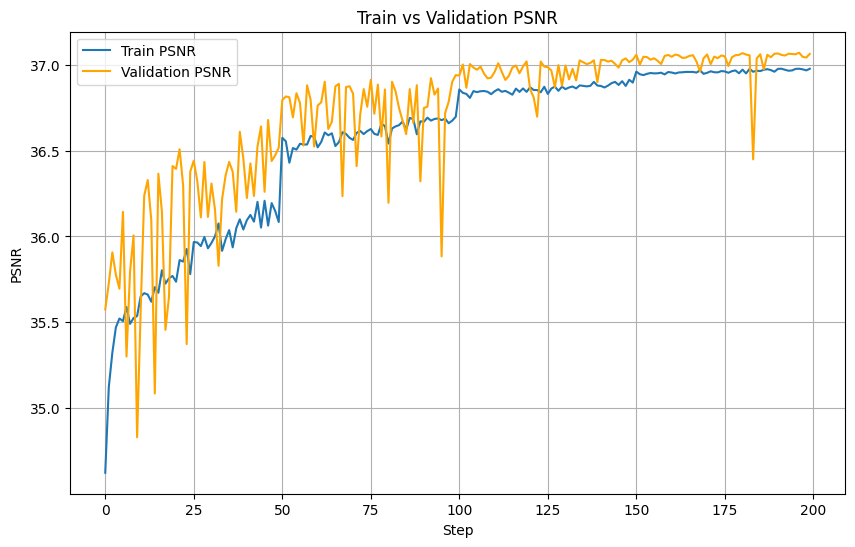

In [26]:
# Extract scalar events for Train PSNR and Validation PSNR
train_psnr_scalars = ea_without_guided.Scalars(metrics_tags_without_guided[0])  # Train PSNR
val_psnr_scalars = ea_without_guided.Scalars(metrics_tags_without_guided[1])   # Validation PSNR

# Extract steps and values for Train PSNR and Validation PSNR
train_psnr_steps = [scalar.step for scalar in train_psnr_scalars]
train_psnr_values = [scalar.value for scalar in train_psnr_scalars]

val_psnr_steps = [scalar.step for scalar in val_psnr_scalars]
val_psnr_values = [scalar.value for scalar in val_psnr_scalars]

# Plot Train vs Validation PSNR
plt.figure(figsize=(10, 6))
plt.plot(train_psnr_steps, train_psnr_values , label="Train PSNR")
plt.plot(val_psnr_steps, val_psnr_values,  label="Validation PSNR", color='orange')
plt.title("Train vs Validation PSNR")
plt.xlabel("Step")
plt.ylabel("PSNR")
plt.legend()
plt.grid(True)
plt.show()

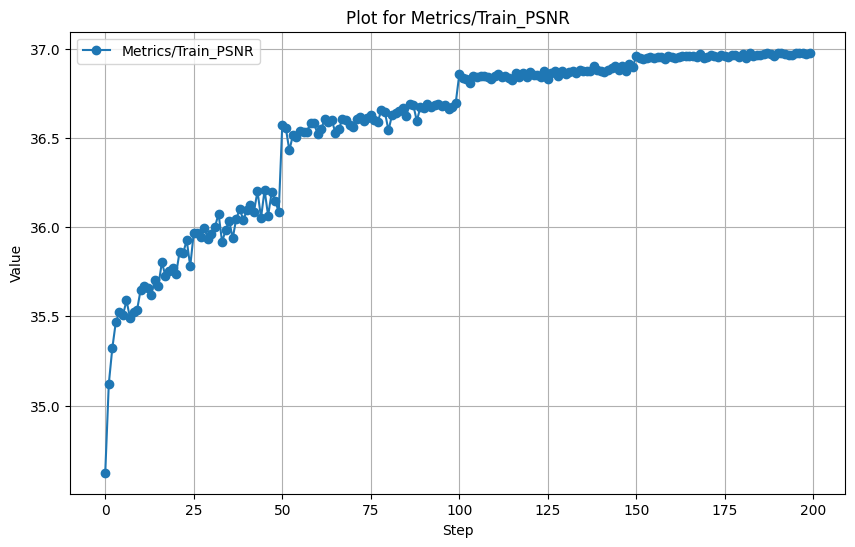

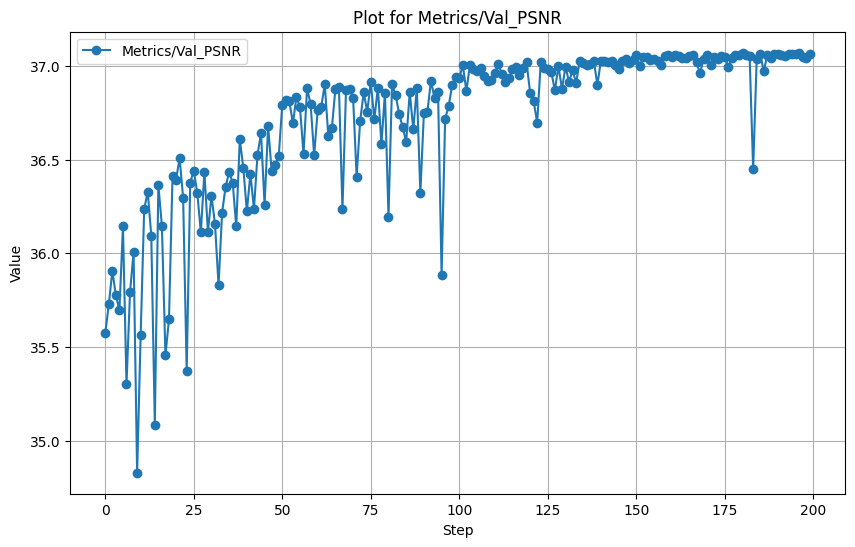

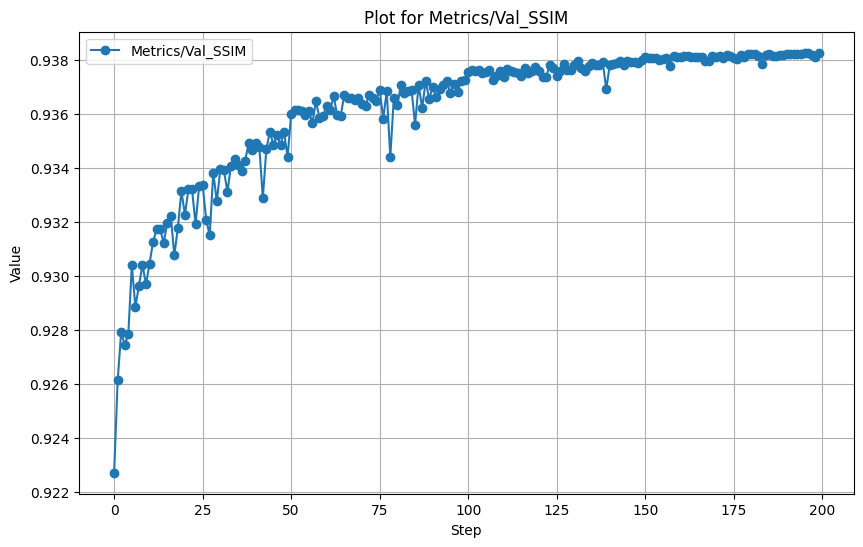

In [20]:
# Extract scalar events for metrics_tags_without_guided
for tag in metrics_tags_without_guided:
    scalars = ea_without_guided.Scalars(tag)
    steps = [scalar.step for scalar in scalars]
    values = [scalar.value for scalar in scalars]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(steps, values, marker='o', label=tag)
    plt.title(f"Plot for {tag}")
    plt.xlabel("Step")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


Tag: Loss/Total
Step: 0, Value: 1.3097643852233887
Step: 1, Value: 1.678737998008728
Step: 2, Value: 1.6545014381408691
Step: 3, Value: 1.7154009342193604
Step: 4, Value: 1.4377268552780151
Step: 5, Value: 1.9048951864242554
Step: 6, Value: 1.8629149198532104
Step: 7, Value: 2.1823718547821045
Step: 8, Value: 2.3307342529296875
Step: 9, Value: 2.119894027709961
Step: 10, Value: 2.9095511436462402
Step: 11, Value: 2.0639123916625977
Step: 12, Value: 2.7120587825775146
Step: 13, Value: 2.6950464248657227
Step: 14, Value: 2.4356446266174316
Step: 15, Value: 2.5016589164733887
Step: 16, Value: 2.84615421295166
Step: 17, Value: 2.522077798843384
Step: 18, Value: 2.515908718109131
Step: 19, Value: 2.7521297931671143
Step: 20, Value: 2.7665963172912598
Step: 21, Value: 2.580554962158203
Step: 22, Value: 2.7579779624938965
Step: 23, Value: 2.754592180252075
Step: 24, Value: 2.7861907482147217
Step: 25, Value: 2.8421332836151123
Step: 26, Value: 2.950467348098755
Step: 27, Value: 2.71096038818

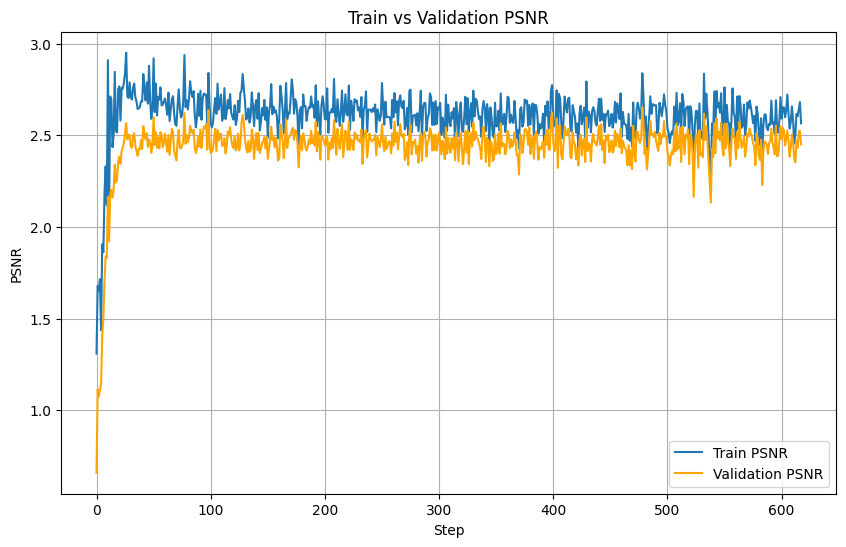

In [51]:


log_file_path_without_guided = r"C:\Users\abd\d\ai\dehaze\runs\sr_training_logs_teacher\events.out.tfevents.1746084032.m.31156.0"
log_file_path_without_guided = r"C:\Users\abd\d\ai\dehaze\runs\sr_training_logs\events.out.tfevents.1745997505.m.37084.2"

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

ea_without_guided = EventAccumulator(log_file_path_without_guided)
ea_without_guided.Reload()

for tag_without_guided in ea_without_guided.Tags()["scalars"]:
    print(f"\nTag: {tag_without_guided}")
    for scalar_event in ea_without_guided.Scalars(tag_without_guided):
        print(f"Step: {scalar_event.step}, Value: {scalar_event.value}")

# List scalar tags that start with "Metrics/"
metrics_tags_without_guided = [tag for tag in ea_without_guided.Tags()["scalars"] if tag.startswith("Loss/")]
print(metrics_tags_without_guided)
# Extract scalar events for Train PSNR and Validation PSNR
train_psnr_scalars = ea_without_guided.Scalars(metrics_tags_without_guided[1])  # Train PSNR
val_psnr_scalars = ea_without_guided.Scalars(metrics_tags_without_guided[2])   # Validation PSNR

# Extract steps and values for Train PSNR and Validation PSNR
train_psnr_steps = [scalar.step for scalar in train_psnr_scalars]
train_psnr_values = [scalar.value for scalar in train_psnr_scalars]

val_psnr_steps = [scalar.step for scalar in val_psnr_scalars]
val_psnr_values = [scalar.value for scalar in val_psnr_scalars]

# Plot Train vs Validation PSNR
plt.figure(figsize=(10, 6))
plt.plot(train_psnr_steps, train_psnr_values , label="Train PSNR")
plt.plot(val_psnr_steps, val_psnr_values,  label="Validation PSNR", color='orange')
plt.title("Train vs Validation PSNR")
plt.xlabel("Step")
plt.ylabel("PSNR")
plt.legend()
plt.grid(True)
plt.show()